I am using NumPy for calculations and Matplotlib to plot data and cost progression.

In [13]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import math

# Optional: nicer plot style


We have 2 houses. A house of 1000 sqft costs $300,000, and 2000 sqft costs $500,000.

In [5]:
# Features (size in 1000 sqft)
x_train = np.array([1.0, 2.0])

# Target (price in 1000 dollars)
y_train = np.array([300.0, 500.0])

The cost function measures how far our predictions are from actual values. Gradient descent minimizes this cost.

In [6]:
def compute_cost(x, y, w, b):
    """
    Compute Mean Squared Error (MSE) cost function
    """
    m = len(x)  # number of training examples
    cost = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost += (f_wb - y[i])**2
    total_cost = cost / (2 * m)
    return total_cost

Gradients tell us the slope of the cost function. They indicate the direction to adjust 
𝑤
w and 
𝑏
b to reduce the cost.

In [ ]:
def compute_gradient(x, y, w, b):
    """
    Compute the partial derivatives (gradients) of the cost function
    """
    m = len(x)
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw += (f_wb - y[i]) * x[i]
        dj_db += (f_wb - y[i])

    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db

alpha is the learning rate.

num_iters is how many steps to take.

At each step, we calculate gradients and update parameters.

In [ ]:
def gradient_descent(x, y, w_init, b_init, alpha, num_iters):
    """
    Performs gradient descent to learn w and b
    """
    w, b = w_init, b_init
    J_history = []

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b)

        # Update parameters
        w -= alpha * dj_dw
        b -= alpha * dj_db

        # Save cost for plotting
        J_history.append(compute_cost(x, y, w, b))

        # Print progress every 1000 iterations
        if i % max(1, num_iters // 10) == 0:
            print(f"Iteration {i}: Cost={J_history[-1]:.2f}, w={w:.2f}, b={b:.2f}")

    return w, b, J_history

We start from 

w=0,b=0 and let gradient descent find the best values.

In [9]:
# Initialize parameters
w_init = 0
b_init = 0
alpha = 0.01
iterations = 10000

# Run gradient descent
w_final, b_final, J_hist = gradient_descent(x_train, y_train, w_init, b_init, alpha, iterations)
print(f"\nFinal parameters: w={w_final:.2f}, b={b_final:.2f}")

Iteration 0: Cost=79274.81, w=6.50, b=4.00
Iteration 1000: Cost=3.41, w=194.91, b=108.23
Iteration 2000: Cost=0.79, w=197.55, b=103.97
Iteration 3000: Cost=0.18, w=198.82, b=101.91
Iteration 4000: Cost=0.04, w=199.43, b=100.92
Iteration 5000: Cost=0.01, w=199.73, b=100.44
Iteration 6000: Cost=0.00, w=199.87, b=100.21
Iteration 7000: Cost=0.00, w=199.94, b=100.10
Iteration 8000: Cost=0.00, w=199.97, b=100.05
Iteration 9000: Cost=0.00, w=199.99, b=100.02

Final parameters: w=199.99, b=100.01


Cost should decrease over iterations. If it increases, the learning rate is too high.

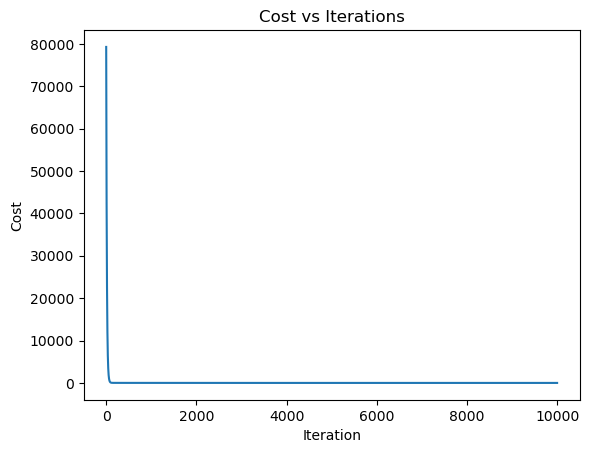

In [10]:
plt.plot(J_hist)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost vs Iterations")
plt.show()

Use the learned parameters to predict house prices for any size.

In [11]:
def predict(x, w, b):
    return w * x + b

# Predict house prices
print(f"1000 sqft: {predict(1.0, w_final, b_final):.1f} thousand dollars")
print(f"1200 sqft: {predict(1.2, w_final, b_final):.1f} thousand dollars")
print(f"2000 sqft: {predict(2.0, w_final, b_final):.1f} thousand dollars")

1000 sqft: 300.0 thousand dollars
1200 sqft: 340.0 thousand dollars
2000 sqft: 500.0 thousand dollars
